In [6]:
# Existe alguma relação entre temperatura, humidade relativa do ar e concentração de CO?

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from datetime import datetime
import missingno as msno
%matplotlib inline

In [19]:
data = pd.read_csv("../data/AirQualityUCI.csv", delimiter=";")

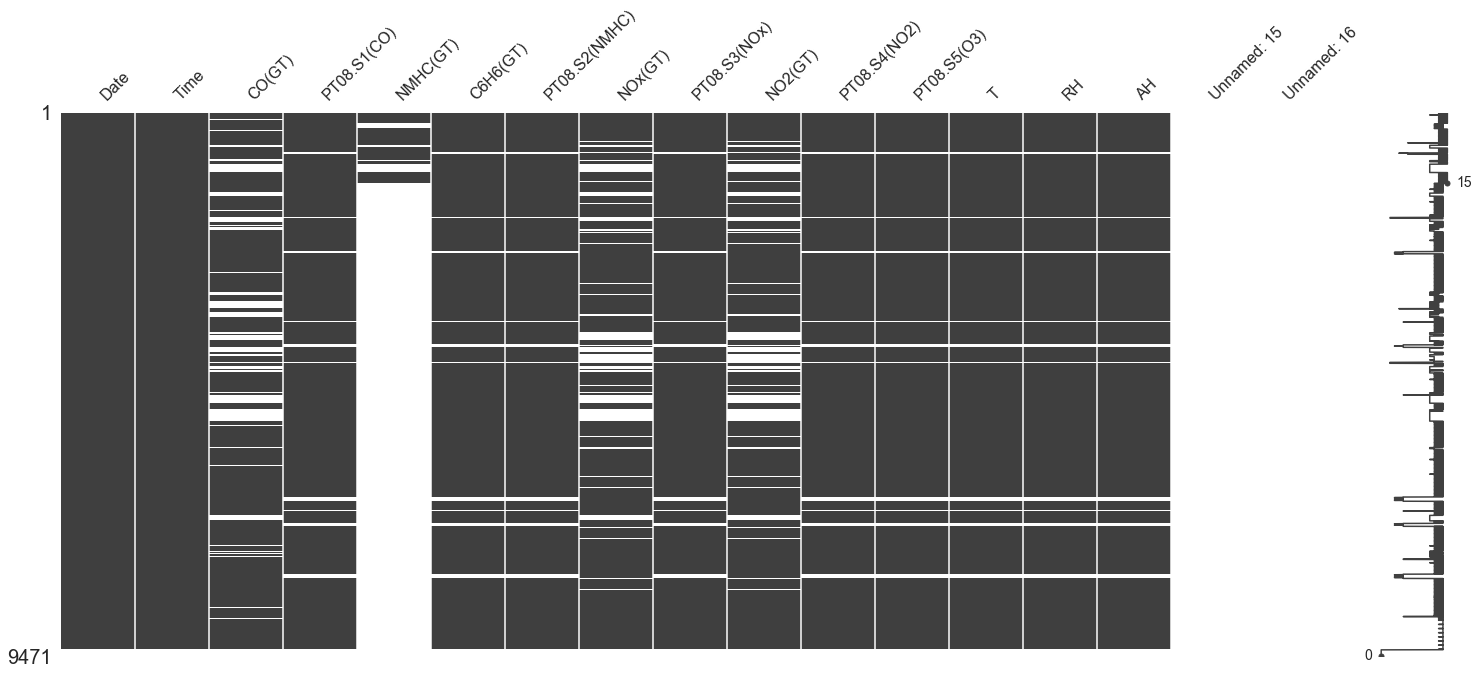

In [22]:
# Limpeza de dados
data = data.replace("-200,0", np.nan)
data = data.replace("-200", np.nan)
data = data.replace(-200, np.nan)
data = data.replace("NaN", np.nan)
msno.matrix(data)

In [23]:
# Remover coluna MNHC(GT) porque possui muitos dados em branco
data = data.drop(["NMHC(GT)"], axis=1)

# Remover as 2 ultimas colunas, não possuem dados
data = data.drop(data.columns[[14, 15]], axis=1)

# Drop todos os registros que possuem Nan
data = data.dropna()

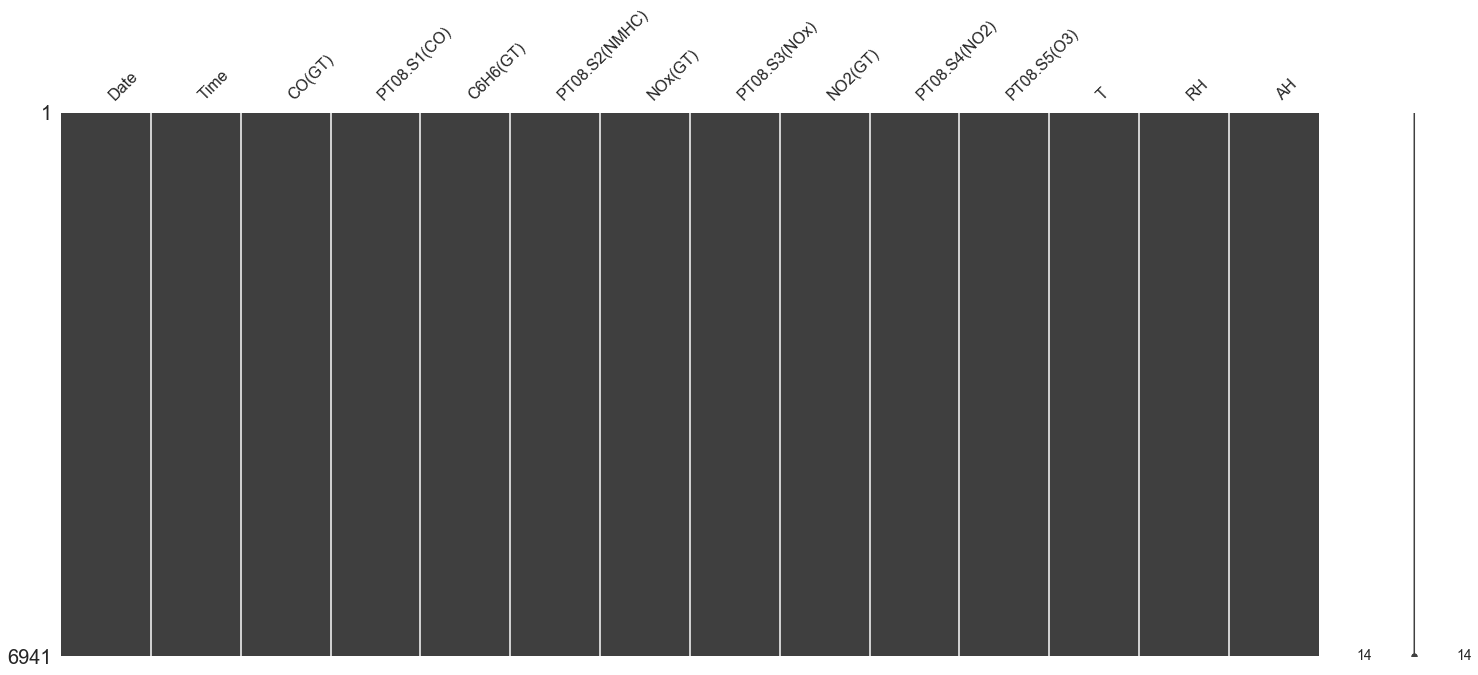

In [24]:
# Visualizar dados limpos
msno.matrix(data)

In [25]:
interestData = data[['CO(GT)', 'T', 'RH']]

In [26]:
# Converter o valores de string para float
interestData['CO(GT)'] = interestData['CO(GT)'].str.replace(',', '.', regex=False)
interestData['CO(GT)'] = interestData['CO(GT)'].astype(float)

interestData['T'] = interestData['T'].str.replace(',', '.', regex=False)
interestData['T'] = interestData['T'].astype(float)

interestData['RH'] = interestData['RH'].str.replace(',', '.', regex=False)
interestData['RH'] = interestData['RH'].astype(float)

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launche

In [27]:
interestData.corr()

,CO(GT),T,RH
CO(GT),1.000000,0.018334,0.064753
T,0.018334,1.000000,-0.563909
RH,0.064753,-0.563909,1.000000


In [ ]:
# Conforme a tabela acima não existe uma forte relacão entre CO2, Temperatura e Umidade Relativa do Ar